# Create FewShot Dataset for German Endangerd Birds

The birds should include the ["Windkraftsensiblen Arten"](https://raphaelschwinger.notion.site/Zielvogelarten-Brutvogelarten-der-UMK-Liste-1-b137cb376dde4d28a27a903fd6e291b9?pvs=4)

and the endangered birds accourding to the ["Rote Liste des Nabu"](https://raphaelschwinger.notion.site/Rote-Liste-der-Brutv-gel-e706db57abcb4e76b0ce64410b422172?pvs=4).

In [1]:
# switch to parent directory
import os
os.chdir("../..")

In [2]:
# get current working directory
cwd = os.getcwd()
print(cwd)

/workspace


1. Download Metadata from XenoCanto

In [3]:
from huggingface_hub import hf_hub_download

metadata_file = hf_hub_download(repo_id="DBD-research-group/gadme_v1", filename="metadata.parquet", repo_type="dataset", subfolder='data/xenocanto_M_withoutnd', revision="data", cache_dir="data/xenocanto")

metadata.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

In [4]:
# load metadata in pandas dataframe
import pandas as pd
metadata = pd.read_parquet(metadata_file)


In [5]:
# print basic statistic

# number of samples
print("Number of samples: {}".format(len(metadata)))

# Different species
print("Number of different species: {}".format(len(metadata['ebird_code'].unique())))

# Ebird_code with the most samples
print("Ebird_code with the most samples: {}".format(metadata['ebird_code'].value_counts().idxmax()))
# print number of samples for ebird_code with the most samples
print("Number of samples for ebird_code with the most samples: {}".format(metadata['ebird_code'].value_counts().max()))

X = 10
# Print number of ebird_codes with less then X samples
print("Number of ebird_codes with less then 10 samples: {}".format(len(metadata['ebird_code'].value_counts()[metadata['ebird_code'].value_counts() < 10])))

# Print ebird_codes with less then X samples
print("Ebird_codes with less then 10 samples: {}".format(metadata['ebird_code'].value_counts()[metadata['ebird_code'].value_counts() < 10]))


Number of samples: 80012
Number of different species: 409
Ebird_code with the most samples: eurlin1
Number of samples for ebird_code with the most samples: 500
Number of ebird_codes with less then 10 samples: 11
Ebird_codes with less then 10 samples: ebird_code
astgna1    9
hawgoo     9
barpet     9
buvhum1    8
rufant3    8
palila     7
crfpar     7
ercfra     6
stvhum2    5
hawhaw     3
hawpet1    2
Name: count, dtype: int64


In [6]:
# the number of ebird_codes that have x samples
Y = [len(metadata['ebird_code'].value_counts()[metadata['ebird_code'].value_counts() == x]) for x in range(1, metadata['ebird_code'].value_counts().max()+1)]

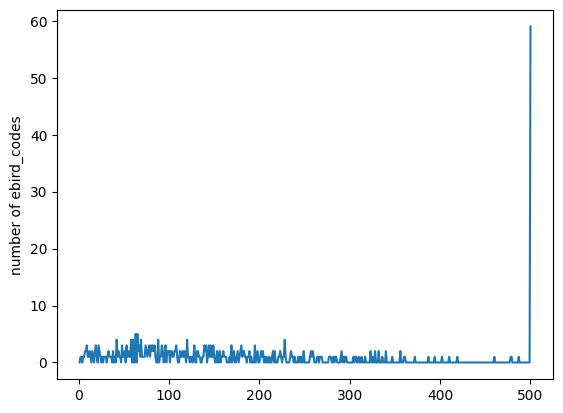

In [7]:
# plot where x achis is goes from 1 to the number of samples of the ebird_code that has the most samples and where the y achis showes the number of ebird_codes that have at least x samples
import matplotlib.pyplot as plt
plt.plot(range(1, metadata['ebird_code'].value_counts().max()+1), Y)
plt.ylabel('number of ebird_codes')
plt.show()

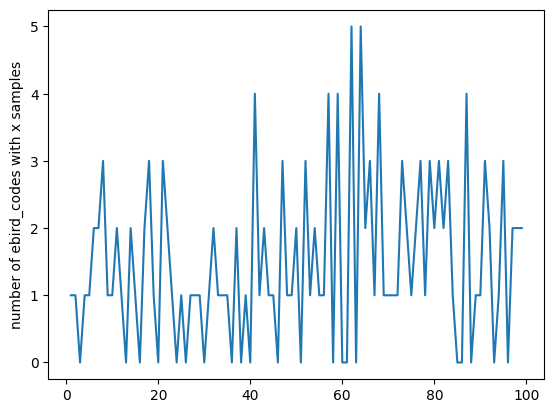

In [8]:
plt.plot(range(1, 100), Y[1:100])
plt.ylabel('number of ebird_codes with x samples')
plt.show()

# Load database with GADME datamodule

## Spectrogram

In [9]:
from src.datamodule.components.event_decoding import EventDecoding
from src.datamodule.components.transforms import PreprocessingConfig, GADMETransformsWrapper
from src.datamodule.base_datamodule import DatasetConfig
from src.datamodule.gadme_datamodule import GADMEDataModule

transforms = GADMETransformsWrapper(model_type='vision', decoding=EventDecoding(sampling_rate=32000))
dataset_config = DatasetConfig(
    data_dir="/workspace/data",
    dataset_name="xenocanto_m_withoutnd",
    hf_path="DBD-research-group/gadme_v1",
    hf_name="xenocanto_M_withoutnd",
    seed=42,
    n_classes=410,
    n_workers=1,
    val_split=0.05,
    task="multiclass",
    subset=None,
    sampling_rate=32000,
)

dm = GADMEDataModule(dataset=dataset_config, transforms=transforms)


In [11]:
dm.prepare_data()
print(dm.len_trainset)
print(dm.num_classes)

Saving the dataset (0/1 shards):   0%|          | 0/305742 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/16092 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4001 [00:00<?, ? examples/s]

305742
410


dict_keys(['input_values', 'labels'])
torch.Size([32, 1, 128, 1024])


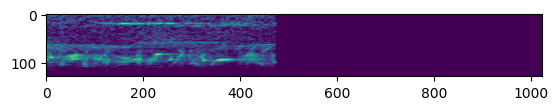

In [13]:
from matplotlib import pyplot as plt
dm.setup(stage='fit')
train_dataloader = dm.train_dataloader
# get first batch
batch = next(iter(train_dataloader()))
print(batch.keys())
print(batch['input_values'].shape)
spectorgram = batch['input_values'][0]
plt.imshow(spectorgram.squeeze().numpy())